# <font color="red"  face="微软雅黑"><center>《机器学习》</center></font>

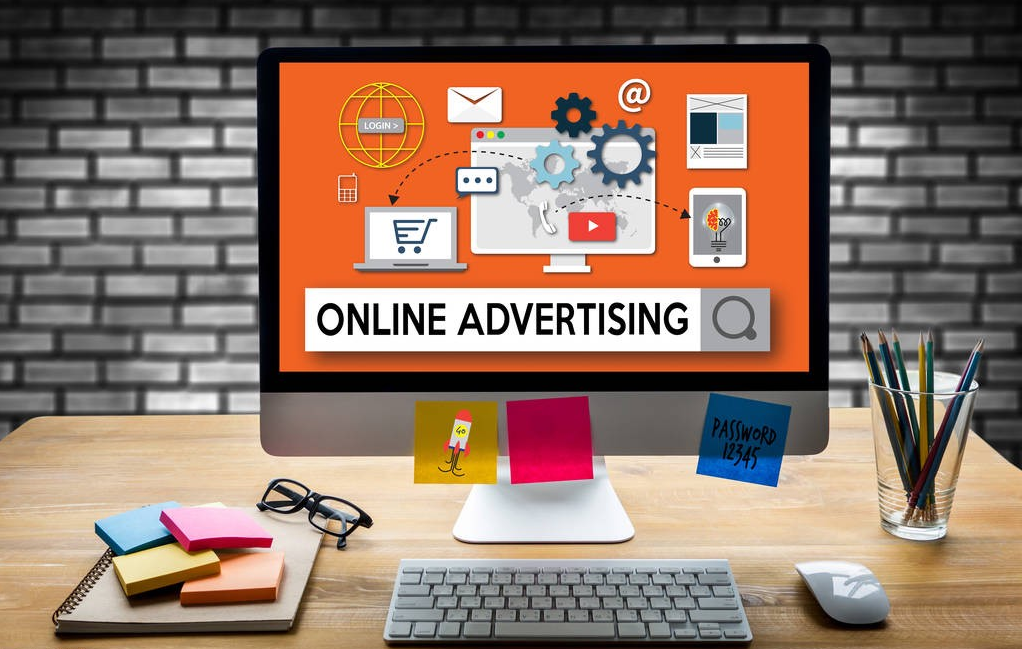

#  <font color=#0099ff  face="微软雅黑"><center>实验七 决策树预测广告点击</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过用决策树算法预测广告点击、掌握导入数据、预处理数据、模型训练、模型评估、模型优化、可视化方法。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  scikit-learn Jupyter Notebook </div>
    
### 【实验内容】

本实验用Sklearn模块的 DecisionTreeClassifier对广告点击进行分类预测


### 【预备知识】

机器学习流程、特征工程技巧、分类模型评价、DT算法


### 【实验背景】

通过决策树算法对广告点击进行分类


### 【数据介绍】

|            Feature            |                        Description                        |
|:-----------------------------:|:---------------------------------------------------------:|
| 1. Daily Time Spent on a Site | Time spent by the user on a site in minutes.              |
| 2. Age                        | Customer's age in terms of years.                         |
| 3. Area Income                | Average income of geographical area of consumer.          |
| 4. Daily Internet Usage       | Avgerage minutes in a day consumer is on the internet.    |
| 5. Ad Topic Line              | Headline of the advertisement.                            |
| 6. City                       | City of the consumer.                                     |
| 7. Male                       | Whether or not a consumer was male.                       |
| 8. Country                    | Country of the consumer.                                  |
| 9. Timestamp                  | Time at which user clicked on an Ad or the closed window. |
| 10. Clicked on Ad             | 0 or 1 is indicated clicking on an Ad.                    |


# 【实验步骤】

## 7. 决策树算法预测广告点击

## 7-1 读取数据

In [1]:
# 导入包
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore") #忽视警告

In [2]:
#读取原始数据，并输出前五行数据
data = pd.read_csv('advertising.csv')
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

## 7-2 查看数据基本信息

In [3]:
#查看数据大小
data.shape

(1000, 10)

In [4]:
# 一次性查看数据的特征、是否有缺失值、数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# 查看整个数据集是否存在重复值
data.duplicated().any()

False

In [6]:
#查看点击广告和未点击广告的数量
data.groupby("Clicked on Ad").size()

Clicked on Ad
0    500
1    500
dtype: int64

In [16]:
#  点击广告最多的前10个国家及其点击次数
# 统计某列中另一列的数量
#data.groupby('Country')['Clicked on Ad'].count().reset_index(name='Clicked on Ad')


IndexingError: Too many indexers

## 7-3 特征工程

In [8]:
# “Timestamp” 是object数据类型，为了方便研究时间因素的影响，将“timestamp”列转换成 datetime 数据类
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [9]:
#将timestamp 拆分成 Month,Day of Week,Hour
data['Month']=data['Timestamp'].apply(lambda time : time.month)
data['DayofWeek']=data['Timestamp'].apply(lambda time : time.dayofweek)
data['Hour']=data['Timestamp'].apply(lambda time : time.hour)

In [18]:
#展示新的数据集前5行
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad  Month  DayofWeek  Hour  
0 2016-03-27 00:53:11              0      3          6     0  
1 2016-04-04 01:39:02              0      4          0     1  
2 2016-03-13 20:35:42              0      3          6    20  
3 2016-01-10 02:31:19              0      1          6     2  
4 2016-06-03 03:36:18              0      6          4     3

## 7-5 模型训练

### 7-5-1 拆分数据集，并查看各部分数据样本大小

In [25]:
#将数据拆分成属性X,标签y
#这里仅先使用以下几个特征作为x,    “Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male',"Month","DayofWeek","Hour"
x = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
y = data['Clicked on Ad']


In [26]:
#将数据按照测试集30%，训练集70%进行划分，并查看各部分数据集大小
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 47)

print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(x_train.shape))
print("x_test shape:{}".format(x_test.shape))
print("y_test shape:{}".format(y_test.shape))

x_train shape:(700, 8)
y_train shape:(700, 8)
x_test shape:(300, 8)
y_test shape:(300,)


### 7-5-2 使用决策树进行预测

## 7-6 模型评估

In [14]:
## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果






The accuracy of the Decision Tree is: 0.95


In [15]:
## 利用混淆矩阵来评估模型效果







The confusion matrix result:
 [[139   7]
 [  8 146]]


In [16]:
# 评估报告










              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.95      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## 7-7 模型结果可视化

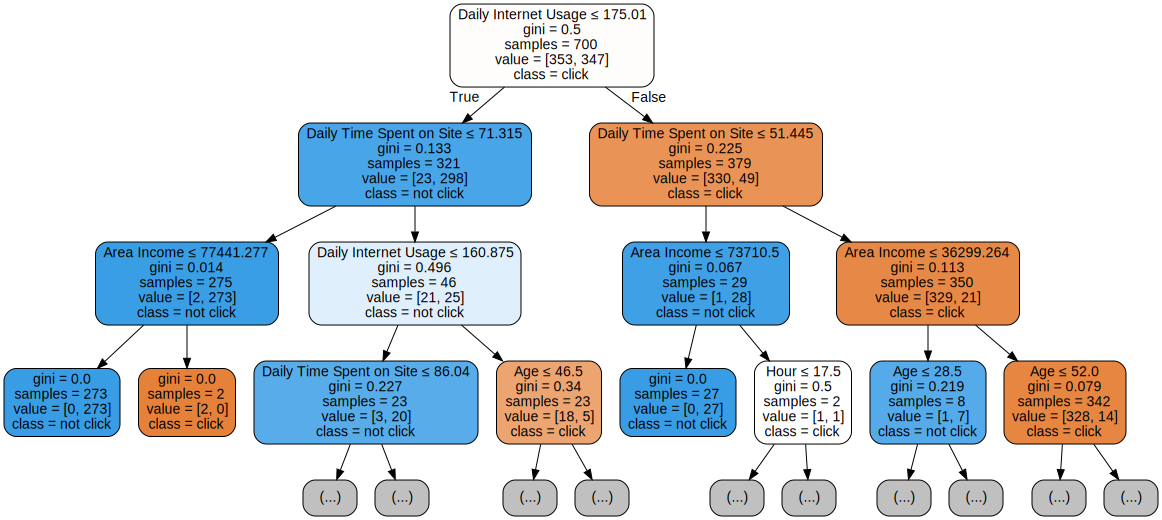

## 7-8 模型落地应用

### 现在有一位新用户，每天在公司网页花费的时间是 79分钟，年龄28岁，收入62628，每天上网时间180分钟，是位男士，之前点击或关闭窗口的时间在8月的星期6，晚上8点钟，请问这个人会点击广告吗？要不要给他投放广告？

预测此客户是否会点击广告的结果是 [0]


### 请问这个人会点击吗？要不要给他投放广告？

### 答案：